In [ ]:
!unzip "/content/drive/MyDrive/DLCG_PART_2/face_images.zip" -d "/content/data"

Archive:  /content/drive/MyDrive/DLCG_PART_2/face_images.zip
   creating: /content/data/face_images/
  inflating: /content/data/face_images/image00729.jpg  
  inflating: /content/data/face_images/image00013.jpg  
  inflating: /content/data/face_images/image00609.jpg  
  inflating: /content/data/face_images/image00592.jpg  
  inflating: /content/data/face_images/image00097.jpg  
  inflating: /content/data/face_images/image00591.jpg  
  inflating: /content/data/face_images/image00394.jpg  
  inflating: /content/data/face_images/rename.py  
  inflating: /content/data/face_images/image00281.jpg  
  inflating: /content/data/face_images/image00540.jpg  
  inflating: /content/data/face_images/image00675.jpg  
  inflating: /content/data/face_images/image00511.jpg  
  inflating: /content/data/face_images/image00361.jpg  
  inflating: /content/data/face_images/image00154.jpg  
  inflating: /content/data/face_images/image00472.jpg  
  inflating: /content/data/face_images/image00310.jpg  
  inflat

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
import cv2
import os
import glob

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
img_data = []
for img in os.listdir("/content/data/face_images"):
  img_file = cv2.imread("/content/data/face_images/" + img)
  if(type(img_file) != type(None)):
    img_data.append(img_file)

In [ ]:
cv2.imwrite("/content/data/1.jpg", img_data[0])

True

In [ ]:
len(img_data)

750

In [ ]:
count = 0
for i in img_data:
  if(type(i) == type(None)):
    print(count)
  count += 1

In [ ]:
del img_data[573]

In [ ]:
# https://towardsdatascience.com/complete-image-augmentation-in-opencv-31a6b02694f5
import random

def fill(img, h, w):
    img = cv2.resize(img, (h, w), cv2.INTER_CUBIC)
    return img

# HORIZONTAL SHIFT - RANDOM RATIO 0 - 1
def horizontal_shift(img, ratio=0.0):
    ratio = random.uniform(-ratio, ratio)
    h, w = img.shape[:2]
    to_shift = w*ratio
    if ratio > 0:
        img = img[:, :int(w-to_shift), :]
    if ratio < 0:
        img = img[:, int(-1*to_shift):, :]
    img = fill(img, h, w)
    return img

# VERTICAL SHIFT - RANDOM RATIO 0 - 1
def vertical_shift(img, ratio=0.0):
    ratio = random.uniform(-ratio, ratio)
    h, w = img.shape[:2]
    to_shift = h*ratio
    if ratio > 0:
        img = img[:int(h-to_shift), :, :]
    if ratio < 0:
        img = img[int(-1*to_shift):, :, :]
    img = fill(img, h, w)
    return img

# BRIGHTNESS - RANDOM LOW, HIGH 
def brightness(img, low, high):
    value = random.uniform(low, high)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv = np.array(hsv, dtype = np.float64)
    hsv[:,:,1] = hsv[:,:,1]*value
    hsv[:,:,1][hsv[:,:,1]>255]  = 255
    hsv[:,:,2] = hsv[:,:,2]*value 
    hsv[:,:,2][hsv[:,:,2]>255]  = 255
    hsv = np.array(hsv, dtype = np.uint8)
    img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return img

# ZOOM - RANDOM VALUE 0 - 1
def zoom(img, value):
    value = random.uniform(value, 1)
    h, w = img.shape[:2]
    h_taken = int(value*h)
    w_taken = int(value*w)
    h_start = random.randint(0, h-h_taken)
    w_start = random.randint(0, w-w_taken)
    img = img[h_start:h_start+h_taken, w_start:w_start+w_taken, :]
    img = fill(img, h, w)
    return img

# HORIZONTAL FLIP - RANDOM BOOLEAN
def horizontal_flip(img, flag):
    if flag:
        return cv2.flip(img, 1)
    else:
        return img

# VERTICAL FLIP - RANDOM BOOLEAN
def vertical_flip(img, flag):
    if flag:
        return cv2.flip(img, 0)
    else:
        return img

# ROTATION - RANDOM ANGLE
def rotation(img, angle):
    angle = int(random.uniform(-angle, angle))
    h, w = img.shape[:2]
    M = cv2.getRotationMatrix2D((int(w/2), int(h/2)), angle, 1)
    img = cv2.warpAffine(img, M, (w, h))
    return img

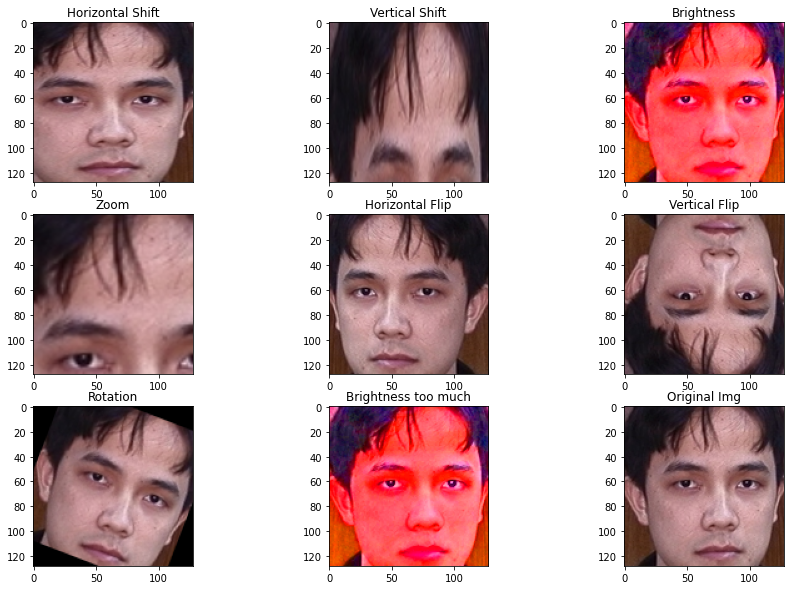

In [ ]:
img_temp = cv2.imread("/content/data/face_images/image00072.jpg")
img_temp = cv2.cvtColor(img_temp, cv2.COLOR_BGR2RGB)
img_aug_1 = horizontal_shift(img_temp, 0.6)
img_aug_2 = vertical_shift(img_temp, 0.7)
img_aug_3 = brightness(img_temp, 0.3, 5)
img_aug_4 = zoom(img_temp, 0.5)
img_aug_5 = horizontal_flip(img_temp, True)
img_aug_6 = vertical_flip(img_temp,True)
img_aug_7 = rotation(img_temp, 45)
img_aug_8 = brightness(img_temp, 0, 10)

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7, ax8, ax9)) = plt.subplots(nrows=3,ncols=3,figsize=(15,10))

ax1.imshow(img_aug_1)
ax1.set_title("Horizontal Shift")
ax2.imshow(img_aug_2)
ax2.set_title("Vertical Shift")
ax3.imshow(img_aug_3)
ax3.set_title("Brightness")
ax4.imshow(img_aug_4)
ax4.set_title("Zoom")
ax5.imshow(img_aug_5)
ax5.set_title("Horizontal Flip")
ax6.imshow(img_aug_6)
ax6.set_title("Vertical Flip")
ax7.imshow(img_aug_7)
ax7.set_title("Rotation")
ax8.imshow(img_aug_8)
ax8.set_title("Brightness too much")
ax9.imshow(img_temp)
ax9.set_title("Original Img")

plt.show()


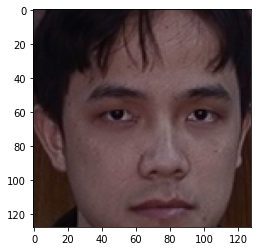

In [ ]:
def scale(img, value):
  return np.array((value * img), dtype=np.uint8)

plt.imshow(scale(img_temp, 0.6))
plt.show()

In [ ]:
img_augmented_data = []
for i in img_data:
  img_augmented_data.append(i)
  for j in range(3):
    img_augmented_data.append(horizontal_shift(i, random.uniform(0, 1)))
    img_augmented_data.append(vertical_shift(i, random.uniform(0, 1)))
    img_augmented_data.append(zoom(i, random.uniform(0, 1)))
    img_augmented_data.append(scale(i, random.uniform(0.6, 1)))
  # break

In [ ]:
img = cv2.cvtColor(img_augmented_data[0], cv2.COLOR_BGR2RGB)
imageLAB = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
L, a, b = cv2.split(imageLAB)

In [ ]:
a_scaled = np.uint8(255.*(a - a.min())/(a.max() - a.min()))
b_scaled = np.uint8(255.*(b - a.min())/(b.max() - b.min()))

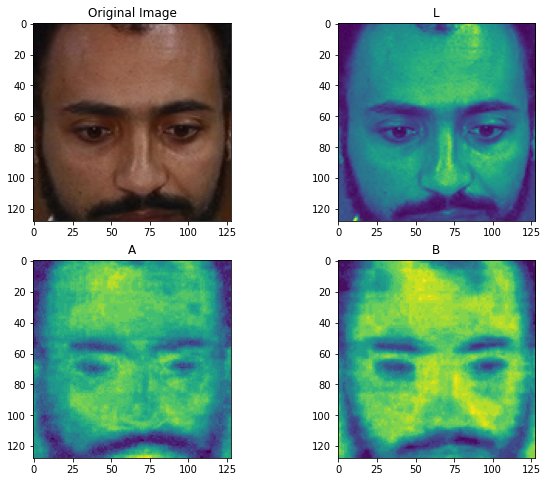

In [ ]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(10,8))

ax1.imshow(img)
ax1.set_title("Original Image")
ax2.imshow(L)
ax2.set_title("L")
ax3.imshow(a)
ax3.set_title("A")
ax4.imshow(b)
ax4.set_title("B")
plt.show()

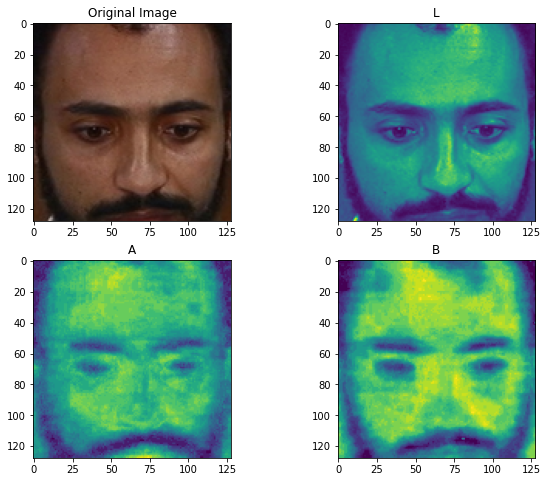

In [ ]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(10,8))

ax1.imshow(img)
ax1.set_title("Original Image")
ax2.imshow(L)
ax2.set_title("L")
ax3.imshow(a_scaled)
ax3.set_title("A")
ax4.imshow(b_scaled)
ax4.set_title("B")
plt.show()

In [ ]:
L_data = []
a_data = []
b_data = []
count = 0
for img in img_augmented_data:
  imageLAB = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
  L, a, b = cv2.split(imageLAB)
  L_data.append(L)
  a_data.append(a)
  b_data.append(b)
  # cv2.imwrite("/content/augmented_dataset/aug/imageaug" + str(count) + ".jpg", img)
  # cv2.imwrite("/content/augmented_dataset/augLab/imageaugLab" + str(count) + ".jpg", imageLAB)
  # cv2.imwrite("/content/augmented_dataset/aug_L/imageaugL" + str(count) + ".jpg", L)
  # cv2.imwrite("/content/augmented_dataset/aug_a/imageauga" + str(count) + ".jpg", a)
  # cv2.imwrite("/content/augmented_dataset/aug_b/imageaugb" + str(count) + ".jpg", b)
  count += 1

In [ ]:
# !zip -r "/content/augmented_data.zip" "/content/augmented_dataset"

In [ ]:
# from google.colab import files
# files.download("/content/augmented_data.zip")

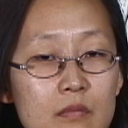

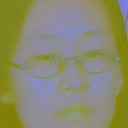

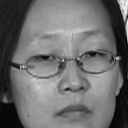

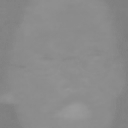

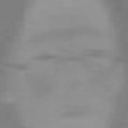

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread("/content/data/face_images/image00004.jpg")
imageLAB = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
cv2_imshow(image)
cv2_imshow(imageLAB)
L,a,b=cv2.split(imageLAB)
cv2_imshow(L)
cv2_imshow(a)
cv2_imshow(b)

In [ ]:
X_data = np.array(L_data, dtype = np.uint8)
X_data = X_data / 255
X_data.shape , np.amax(X_data)

((9750, 128, 128), 0.996078431372549)

In [ ]:
y_data = []
a_mean = []
b_mean = []
for i in range(len(a_data)):
  y_data.append([np.average(a_data[i]), np.average(b_data[i])])
  a_mean.append(np.average(a_data[i]))
  b_mean.append(np.average(b_data[i]))
y_data = np.array(y_data, dtype = np.float32)
y_data = y_data / 255
y_data.shape, np.amax(y_data)

((9750, 2), 0.60852265)

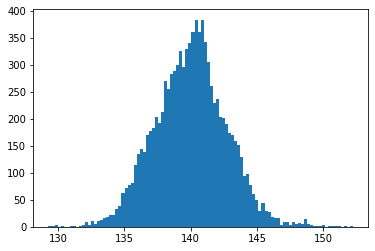

In [ ]:
plt.hist(a_mean, bins=100)
plt.show()

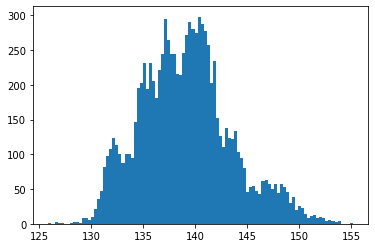

In [ ]:
plt.hist(b_mean, bins=100)
plt.show()

In [ ]:
import random
train_indices = []
for i in range(7800):
  x = random.randint(0, 9749)
  while(x in train_indices):
    x = random.randint(0, 9749)
  train_indices.append(x)
print(len(train_indices))
train_indices = list(set(train_indices))
print(len(train_indices))

7800
7800


In [ ]:
X_train = []
X_test = []
y_train = []
y_test = []

for i in range(9750):
  if(i in train_indices):
    X_train.append(X_data[i])
    y_train.append(y_data[i])
  else:
    X_test.append(X_data[i])
    y_test.append(y_data[i])

X_train = np.array(X_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
y_test= np.array(y_test, dtype=np.float32)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7800, 128, 128), (1950, 128, 128), (7800, 2), (1950, 2))

In [ ]:
X_train = X_train.reshape(7800, 1 , 128, 128)
X_test = X_test.reshape(1950, 1, 128, 128)
X_train.shape

(7800, 1, 128, 128)

In [ ]:
y_train = y_train.reshape(7800, 1, 1, 2)
y_test = y_test.reshape(1950, 1, 1, 2)

In [ ]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Conv2D
model = Sequential()
model.add(Input(shape = (X_train[0].shape)))
model.add(Conv2D(64, 2, activation = "relu",strides = 2,padding = 'same', input_shape=X_train.shape[1:]))
model.add(Conv2D(32, 2, activation = "relu",strides = 2,padding = 'same', input_shape=X_train.shape[1:]))
model.add(Conv2D(16, 2, activation = "relu",strides = 2,padding = 'same', input_shape=X_train.shape[1:]))
model.add(Conv2D(8, 2, activation = "relu",strides = 2,padding = 'same', input_shape=X_train.shape[1:]))
model.add(Conv2D(4, 2, activation = "relu",strides = 2,padding = 'same', input_shape=X_train.shape[1:]))
model.add(Conv2D(2, 2, activation = "relu",strides = 2,padding = 'same', input_shape=X_train.shape[1:]))
model.add(Conv2D(2, 2, activation = "relu",strides = 2,padding = 'same', input_shape=X_train.shape[1:]))
model.add(Dense(2,activation='relu'))
# model.add(Dense(1,activation='relu'))
model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_130 (Conv2D)         (None, 1, 64, 64)         32832     
                                                                 
 conv2d_131 (Conv2D)         (None, 1, 32, 32)         8224      
                                                                 
 conv2d_132 (Conv2D)         (None, 1, 16, 16)         2064      
                                                                 
 conv2d_133 (Conv2D)         (None, 1, 8, 8)           520       
                                                                 
 conv2d_134 (Conv2D)         (None, 1, 4, 4)           132       
                                                                 
 conv2d_135 (Conv2D)         (None, 1, 2, 2)           34        
                                                                 
 conv2d_136 (Conv2D)         (None, 1, 1, 2)         

In [ ]:
loss = tf.keras.losses.MeanSquaredError(name='mean_squared_error')
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=loss)

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lrr = ReduceLROnPlateau(monitor='val_loss', 
                        patience=5, 
                        verbose=1, 
                        factor=0.4, 
                        min_lr=0.0001)

In [ ]:
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=50, 
                    batch_size=512,
                    steps_per_epoch=X_train.shape[0]//512,
                    validation_steps=X_test.shape[0]//512,
                    callbacks=[lrr],
                    shuffle=True)

Epoch 1/50
15/15 [==============================] - 1s 46ms/step - loss: 2.8208e-04 - val_loss: 3.1055e-04 - lr: 0.0010
Epoch 2/50
15/15 [==============================] - 1s 36ms/step - loss: 2.5423e-04 - val_loss: 2.5728e-04 - lr: 0.0010
Epoch 3/50
15/15 [==============================] - 1s 34ms/step - loss: 2.4194e-04 - val_loss: 2.5042e-04 - lr: 0.0010
Epoch 4/50
15/15 [==============================] - 0s 33ms/step - loss: 2.2882e-04 - val_loss: 2.2867e-04 - lr: 0.0010
Epoch 5/50
15/15 [==============================] - 0s 33ms/step - loss: 2.2517e-04 - val_loss: 2.6320e-04 - lr: 0.0010
Epoch 6/50
14/15 [===========================>..] - ETA: 0s - loss: 2.2244e-04
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.
15/15 [==============================] - 0s 33ms/step - loss: 2.2209e-04 - val_loss: 2.1890e-04 - lr: 0.0010
Epoch 7/50
15/15 [==============================] - 1s 34ms/step - loss: 2.0795e-04 - val_loss: 2.1378e-04 - lr: 4.0000e-04
Epoch 8/50
1

In [ ]:
for i in range(10):
  r = random.randint(0, 1949)
  pred = model.predict(X_test[r].reshape(1,1,128,128))
  a = pred[0][0][0][0] * 255
  b = pred[0][0][0][1] * 255
  a_real = y_test[0][0][0][0] * 255
  b_real = y_test[0][0][0][1] * 255
  # print(model.predict(X_test[r].reshape(1,1,128,128)) , y_test[r])
  print(a_real, " --- ", a)
  print(b_real, " --- ", b)

1/1 [==============================] - 0s 26ms/step
139.80597406625748  ---  142.84938275814056
141.24450087547302  ---  144.28766638040543
1/1 [==============================] - 0s 24ms/step
139.80597406625748  ---  139.56900358200073
141.24450087547302  ---  138.46250295639038
1/1 [==============================] - 0s 24ms/step
139.80597406625748  ---  139.84593272209167
141.24450087547302  ---  138.95424216985703
1/1 [==============================] - 0s 27ms/step
139.80597406625748  ---  139.23185527324677
141.24450087547302  ---  137.8638070821762
1/1 [==============================] - 0s 26ms/step
139.80597406625748  ---  138.95732760429382
141.24450087547302  ---  137.37632364034653
1/1 [==============================] - 0s 27ms/step
139.80597406625748  ---  141.4107495546341
141.24450087547302  ---  141.7330026626587
1/1 [==============================] - 0s 28ms/step
139.80597406625748  ---  141.0041105747223
141.24450087547302  ---  141.010904610157
1/1 [=====================

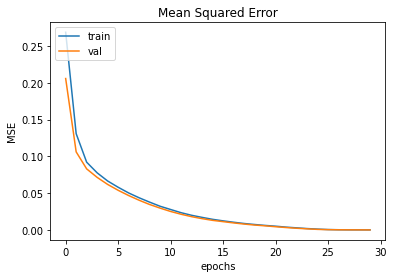

In [ ]:
# PLOTTING THE ACCURACY AND VALIDATION ACCURACY VS EPOCHS
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.save("/content/drive/MyDrive/DLCG_PART_2/mean_chrominance_model.h5")

In [ ]:
model.evaluate(X_test, y_test)

61/61 [==============================] - 1s 6ms/step - loss: 1.9893e-04


0.0001989256707020104